### Lab PSI - C2

In [16]:
import numpy as np
import pandas as pd

np.random.seed(0)
size = (100, 2)
data = np.random.uniform(-10, 10.0, size)

df = pd.DataFrame(data=data, columns = ['x1', 'x2'])
df

,x1,x2
0,0.976270,4.303787
1,2.055268,0.897664
2,-1.526904,2.917882
3,-1.248256,7.835460
4,9.273255,-2.331170
...,...,...
95,-2.035579,-5.803125
96,-6.276140,8.887448
97,4.791016,-0.190824
98,-5.451707,-4.912870


### Booth

In [17]:
from booth import booth

df['eval'] = df.apply(lambda x: booth(x['x1'], x['x2']), axis = 1)

In [18]:
df

,x1,x2,eval
0,0.976270,4.303787,8.254612
1,2.055268,0.897664,9.918820
2,-1.526904,2.917882,33.619965
3,-1.248256,7.835460,55.210831
4,9.273255,-2.331170,131.491592
...,...,...,...
95,-2.035579,-5.803125,647.329377
96,-6.276140,8.887448,95.318116
97,4.791016,-0.190824,25.994080
98,-5.451707,-4.912870,929.602428


##### Podstawowe statystyki bez skalowania

In [19]:
print("Minimum:                ", np.min(df['eval']))
print("Maksimum:               ", np.max(df['eval']))
print("Średnia:                ", np.mean(df['eval']))
print("Odchylenie standardowe: ", np.std(df['eval']))

Minimum:                 1.453080325255348
Maksimum:                1955.1630274897625
Średnia:                 378.7075329153377
Odchylenie standardowe:  417.44030807468755


##### Skalowanie liniowe

In [20]:
from linear_scaling import linear_scaling

linear = linear_scaling(df['eval'])
df['linearly scaled'] = linear

# list = [17.2, 30.1, 9.7, 11.9, 21.2, 15.2]
# test = np.array(list)
# linear_scaling(test)

0.12011361372981391 333.2196023499468


In [21]:
df

,x1,x2,eval,linearly scaled
0,0.976270,4.303787,8.254612,334.211094
1,2.055268,0.897664,9.918820,334.410988
2,-1.526904,2.917882,33.619965,337.257818
3,-1.248256,7.835460,55.210831,339.851175
4,9.273255,-2.331170,131.491592,349.013533
...,...,...,...,...
95,-2.035579,-5.803125,647.329377,410.972673
96,-6.276140,8.887448,95.318116,344.668606
97,4.791016,-0.190824,25.994080,336.341845
98,-5.451707,-4.912870,929.602428,444.877509


##### Podstawowe statystyki po skalowaniu liniowym

In [22]:
print("Minimum:                ", np.min(df['linearly scaled']))
print("Maksimum:               ", np.max(df['linearly scaled']))
print("Średnia:                ", np.mean(df['linearly scaled']))
print("Odchylenie standardowe: ", np.std(df['linearly scaled']))

Minimum:                 333.3941370788529
Maksimum:                568.0612990126657
Średnia:                 378.70753267511043
Odchylenie standardowe:  50.14026391933755


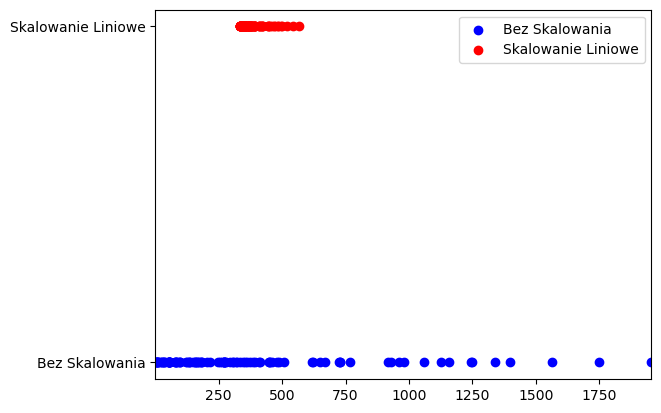

In [23]:
from plot_points import plot_points

plot_points(df['eval'], df['linearly scaled'], 'Bez Skalowania', 'Skalowanie Liniowe')

Wnioski:
1. Skalowanie liniowe zachowuje wartość średnią
2. Zdecydowanie zmniejsza wartość maksymalną, ale również zwiększa wartość minimalną
3. Całościowo wartości są zdecydowanie mniej "rozrzucone" niż w przypadku bez skalowania (ok. 8 krotny spadek wartości odchylenia standardowego)

### Sprawdzenie poprawności implementacji - (C_zwiel = 1.5):
eval(linear)_max = C_zwiel * eval_mean

In [24]:
np.mean(df['eval']) * 1.5

568.0612993730066

In [25]:
np.max(df['linearly scaled'])

568.0612990126657

### Rosenbrock

In [26]:
size = (100, 2)
data = np.random.uniform(-2.048, 2.048, size)

df = pd.DataFrame(data=data, columns = ['x1', 'x2'])
df

,x1,x2
0,-0.770884,0.804223
1,-0.500728,-1.312343
2,-1.946916,-1.772546
3,0.734793,-0.189658
4,0.149828,1.624766
...,...,...
95,-1.791128,-0.311164
96,-0.988430,1.429661
97,-1.911584,1.879993
98,-0.592409,-0.586929


In [27]:
from rosenbrock import rosenbrock

df['eval'] = df.apply(lambda x: rosenbrock(x['x1'], x['x2']), axis = 1)

df

,x1,x2,eval
0,-0.770884,0.804223,7.544379
1,-0.500728,-1.312343,246.571698
2,-1.946916,-1.772546,3103.411412
3,0.734793,-0.189658,53.298768
4,0.149828,1.624766,257.464785
...,...,...,...
95,-1.791128,-0.311164,1246.339408
96,-0.988430,1.429661,24.444589
97,-1.911584,1.879993,323.242089
98,-0.592409,-0.586929,90.497138


##### Podstawowe statystyki bez skalowania

In [28]:
print("Minimum:                ", np.min(df['eval']))
print("Maksimum:               ", np.max(df['eval']))
print("Średnia:                ", np.mean(df['eval']))
print("Odchylenie standardowe: ", np.std(df['eval']))

Minimum:                 0.3648667508189426
Maksimum:                3103.4114119851192
Średnia:                 473.98795692360517
Odchylenie standardowe:  633.1687480503583


#### Skalowanie liniowe

In [29]:
linear = linear_scaling(df['eval'])
df['linearly scaled'] = linear

0.0901315373586818 431.2666934963169


##### Podstawowe statystyki po skalowaniu liniowym

In [30]:
print("Minimum:                ", np.min(df['linearly scaled']))
print("Maksimum:               ", np.max(df['linearly scaled']))
print("Średnia:                ", np.mean(df['linearly scaled']))
print("Odchylenie standardowe: ", np.std(df['linearly scaled']))

Minimum:                 431.2995794974993
Maksimum:                710.9819351150131
Średnia:                 473.98795674334207
Odchylenie standardowe:  57.06847266925064


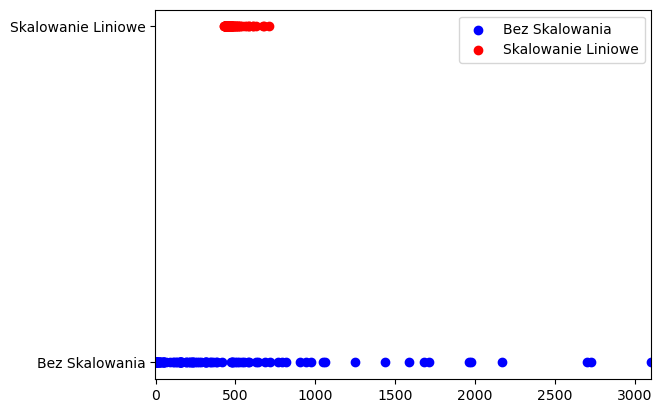

In [31]:
plot_points(df['eval'], df['linearly scaled'], 'Bez Skalowania', 'Skalowanie Liniowe')

Wnioski:
1. Skalowanie liniowe zachowuje wartość średnią
2. Zdecydowanie zmniejsza wartość maksymalną, ale również zwiększa wartość minimalną
3. Całościowo wartości są zdecydowanie mniej "rozrzucone" niż w przypadku bez skalowania (ok. 11 krotny spadek wartości odchylenia standardowego)

### Liniowe skalowanie funkcja celu Rosenbrock VS Booth:
1. W przpadku Rosenbrock bardziej zmniejszyło wartość odchylenia standardowego (11 vs 8 krotnie)
2. W przypadku funkcji Booth wartości były rozłożone bliżej 0, znaczy się przedział ok. (333, 568) vs (431, 710) w funkcji Rosenbrocka*
3. Oby dwie funkcje "wytrącają" wartości mocno z wartości bliskich 0

*Choć należy zaznaczyć, że wyniki dla funkcji Rosenbrocka bez skalowania mają większe zakresy niż funkcji Booth